<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/5%EC%A1%B0_%EB%B3%B5%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EB%AC%B8%EC%A0%9C(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 선형회귀 복습과제 
advertising.csv 데이터 분포를 보고 선형회귀와 적합한 데이터로 선형회귀모형을 만들어 보자!<br>
(kaggle 데이터 이용)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ad = pd.read_csv("/content/drive/MyDrive/비타민/7/advertising.csv", sep=',')
ad.columns = ["TV","Radio","Newspaper","Sales"]
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


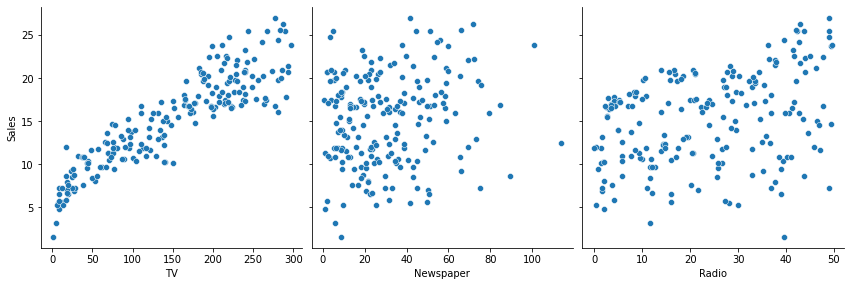

In [3]:
sns.pairplot(ad, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4)

#### 1-1. TV, Newspaper, Radio 중 Sales와 가장 선형 관계를 갖는 데이터를 찾아 '___'안에 넣어 코드를 돌려주세요.

In [4]:
# 데이터 셋 가공
x_data = np.array(ad[['TV']], dtype=np.float32)
y_data = np.array(ad['Sales'], dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200,)
(200, 1)
(200, 1)


In [5]:
# 데이터 셋을 학습 데이터와 검증 데이터로 분할
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(160, 1) (40, 1)
(160, 1) (40, 1)


#### 1-2. regplot으로 산점도와 선형회귀선을 표시하시오.

In [6]:
ad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

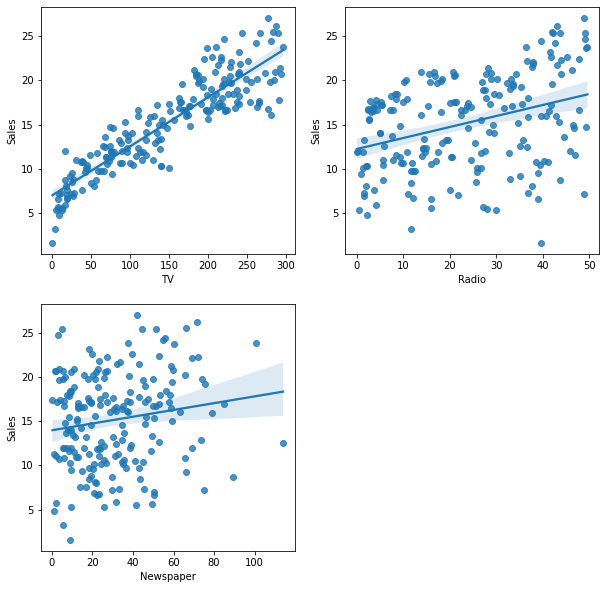

In [7]:
plot_cols = ['Sales', 'TV', 'Radio', 'Newspaper']
plt.figure(figsize = (10, 10))
for idx, col in enumerate(plot_cols[1:]):
    ax1 = plt.subplot(2, 2, idx + 1)
    sns.regplot(x = col, y = plot_cols[0], data = ad, ax = ax1)
plt.show()

#### 1-3. LinearRegression을 이용하여 회귀계수(기울기)와 상수항(절편)을 구하시오.

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

print("회귀계수(기울기) : ", np.round(lr.coef_, 1))
print("상수항(절편) : ", np.round(lr.intercept_, 1))

회귀계수(기울기) :  [[0.1]]
상수항(절편) :  [6.9]


#### 1-4. x_train과  x_val 데이터로 각각 예측을 진행하고, 성능평가를 진행하시오(MSE사용)

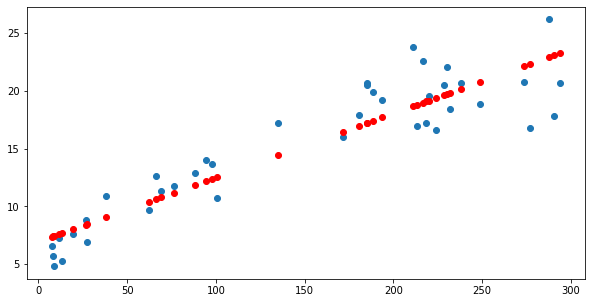

In [9]:
y_val_pred = lr.predict(x_val)

plt.figure(figsize = (10, 5))
plt.scatter(x_val, y_val)
plt.scatter(x_val, y_val_pred, c = 'r')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print('Train MSE : %.4f' %train_mse)
test_mse = mean_squared_error(y_val, y_val_pred)
print('Test MSE : %.4f' %test_mse)

Train MSE : 5.1410
Test MSE : 5.5272


## 2. 로버스트 회귀 과제 
#### housing.data.txt를 이용해서 LSTAT와 MEDV의 선형회귀 모형과 RANSAC 회귀 모형의 기울기와 y절편을 비교해보자! (회귀 발표 ppt 14~15p를 참고*)

In [15]:
df = pd.read_csv("/content/drive/MyDrive/비타민/7/housing.data.txt", header=None, sep='\s+')
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",\
              "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### 2-1. 선형회귀 모형을 구했을 때 기울기와 절편을 구하시오.

In [24]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression(fit_intercept = True)
X = df[['LSTAT']].values
y = df['MEDV'].values
slr.fit(X, y)
print("회귀계수(기울기) : ", slr.coef_[0])
print("상수항(절편) : ", slr.intercept_)

회귀계수(기울기) :  -0.9500493537579906
상수항(절편) :  34.5538408793831


#### 2-2. RANSAC Regressor으로 구했을 때 기울기와 절편을 구하시오.

In [26]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials = 100,
                         min_samples = 50,
                         loss = 'absolute_loss',
                         residual_threshold = 5.0,
                         random_state = 0)

ransac.fit(X, y)

print("회귀계수(기울기) : ", ransac.estimator_.coef_[0])
print("상수항(절편) : ", ransac.estimator_.intercept_)

회귀계수(기울기) :  -0.7463512014001276
상수항(절편) :  29.881856925699854


## * 선형회귀 규제화
### 선형회귀 모형을 토대로 규제화를 연습해봅시다!

#####  auto-mpg.csv를 이용하여 만든 회귀모형에 규제화를 적용하고 규제화 이전과 이후의 계수를 비교해보자! (직접 입력) 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# csv파일을 데이터프레임으로 변환
df=pd.read_csv('/content/drive/MyDrive/비타민/7/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [42]:
# column명 바꾸기
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

# housepower datatype을 float형태로 바꾸기
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [45]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].values
y = df['mpg'].values

문제 1.
* 전체 데이터를 Training data와 test data로 분리해주세요
* 전체 data를 traning data(70%)와 test data(30%)로 나누고 , random state는 1로 설정해주세요.
* X에 대해서 StandardScaler로 scaling도 진행해주세요.

In [52]:
# training data와  test data 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 답안: scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

일반 선형회귀는 다음과 같은 계수를 산출합니다.

In [50]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression(n_jobs=-1)
model_LR.fit(X_train, y_train)
pd.DataFrame(model_LR.coef_,
            index = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], 
             columns = ['Linear regression 계수'])

,Linear regression 계수
cylinders,-0.118256
displacement,-0.004993
horsepower,-0.029330
weight,-0.005315
acceleration,0.148552


문제 2. alpha가 각각 0.01, 1, 100일 때의 Ridge, LASSO regression 모형을 만들어준 다음,  
      학습시키세요. (random state는 1로 설정)

In [56]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

model_Ridge_0_01 = Ridge(alpha = 0.01, random_state = 1)## alpha가 0.01일 때 Ridge Regression
model_Ridge_1 = Ridge(alpha = 1, random_state = 1)## alpha가 1일 때 Ridge Regression
model_Ridge_100 = Ridge(alpha = 100, random_state = 1)## alpha가 100일 때 Ridge Regression
model_Lasso_0_01 = Lasso(alpha = 0.01, random_state = 1)## alpha가 0.01일 때 LASSO Regression
model_Lasso_1 = Lasso(alpha = 1, random_state = 1)## alpha가 1일 때 LASSO Regression
model_Lasso_100 = Lasso(alpha = 100, random_state = 1)## alpha가 100일 때 LASSO Regression

# 6개의 모형 training

model_Ridge_0_01.fit(X_train, y_train)
model_Ridge_1.fit(X_train, y_train)
model_Ridge_100.fit(X_train, y_train)
model_Lasso_0_01.fit(X_train, y_train)
model_Lasso_1.fit(X_train, y_train)
model_Lasso_100.fit(X_train, y_train)



Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

문제 3. r2 score를 사용하여 각 모델의 설명력을 평가하고 비교해주세요.

In [60]:
from sklearn.metrics import r2_score
model_list = [model_Ridge_0_01, model_Ridge_1, model_Ridge_100,
              model_Lasso_0_01, model_Lasso_1, model_Lasso_100]

def print_r2_score(model):
    print(F"{r2_score(y_test, model.predict(X_test)):.5f} --- {model}") ##____에 r2 score관련 코드를 작성하세요.

for model in model_list:
    print_r2_score(model)
#출력 결과는 아래와 같음.

0.72188 --- Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001)
0.72188 --- Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='auto', tol=0.001)
0.72221 --- Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001)
0.72177 --- Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)
0.72797 --- Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=1, selection='cyclic',
      tol=0.0001, warm_start=False)
0.71441 --- Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selectio

# 3 . 와인 분류 #
당신은 와인 회사에 취직했습니다. 
회사는 당신에게 자사의 와인 중, 레드 와인과 화이트 와인을 구분할 수 있는 모델을 
개발해야 월급을 준다고 합니다

얼른 만들어봅시다! 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 필요한 데이터 파일은 카페에 함께 업로드 해놨습니다 # 
# 다운받으시고 원하시는 방식대로 올바른 경로를 입력해서 파일을 읽어주세요! #
df = pd.read_csv('/content/drive/MyDrive/비타민/7/wine.csv', header=None)

In [63]:
df.columns = ['fixed acidity', 'volatile acidity','citric acid','residual sugar'
            ,'chlorides','free sulfur dioxide','total sulfur dioxide','density'
             ,'pH','sulphates','alcohol','quality','class']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [64]:
# 결측값 확인 #
df.info()
print('\n결측값의 수\n',df.isnull().sum())
print('shape : ', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB

결측값의 수
 fixed acidity           0
volatile acidity        0
citric acid   

In [65]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### 3-1 다음의 boxplot을 보고, 너무 과한 outlier를 어떻게 처리하면 좋을지 자유롭게 서술해주세요!
수많은 outlier들이 속해있는 표본들을 모두 지워버리는 게 정답일까요? boxplot바깥의 표본이 너무 많으니 이를 데이터의 일부로 받아들이고 너무 과한 것만 지우는 게 정답일까요?  여러분의 생각을 자유롭게 서술해주세요!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


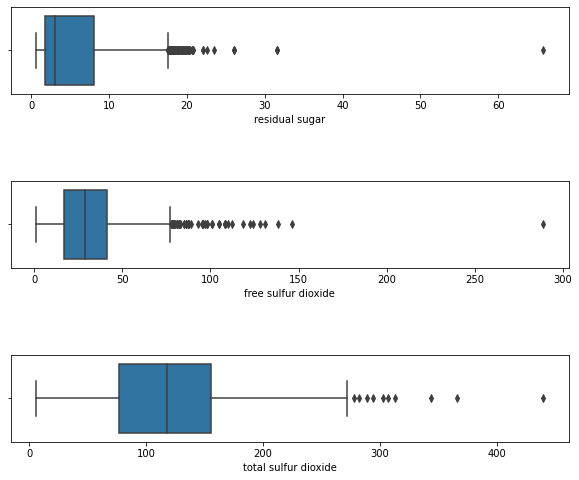

In [66]:
fig, axs = plt.subplots(nrows = 3, figsize = (10,8))

sns.boxplot(df['residual sugar'], ax = axs[0])
sns.boxplot(df['free sulfur dioxide'], ax = axs[1])
sns.boxplot(df['total sulfur dioxide'], ax = axs[2])
fig.subplots_adjust(hspace=1)
plt.show()

##### 문제 part #####
각 column에서 boxplot으로부터 가장 멀리 떨어진 index를 drop한다.

#### 3-2 당신은 그냥 너무 큰 outlier가 있는 와인을 지워버리기로 결정합니다! 아래와 같은 과정으로 지워버린 후에 이제 나머지 전처리를 진행하고자 합니다
모델의 학습을 위해 Standard Scaler를 이용해 정규화를 진행해준 뒤, train 과 test 세트를 분리해주세요! (단, test_size = 0.2, random_state=42로 진행해주세요!)

In [67]:
## 2개만 줄어든 이유는 free dioxide와 total dioxide 각각 너무 큰 outlier가 나온 게 같은 index여서 그렇습니당
print('삭제 전 shape : ', df.shape)
df.drop(df[df['residual sugar'] == 65.800000].index, inplace= True) 
df.drop(df[df['free sulfur dioxide'] == 289.000000].index, inplace= True)
df.drop(df[df['total sulfur dioxide'] == 440.000000].index, inplace= True)
print('삭제 후 shape : ',df.shape)

삭제 전 shape :  (6497, 13)
삭제 후 shape :  (6495, 13)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


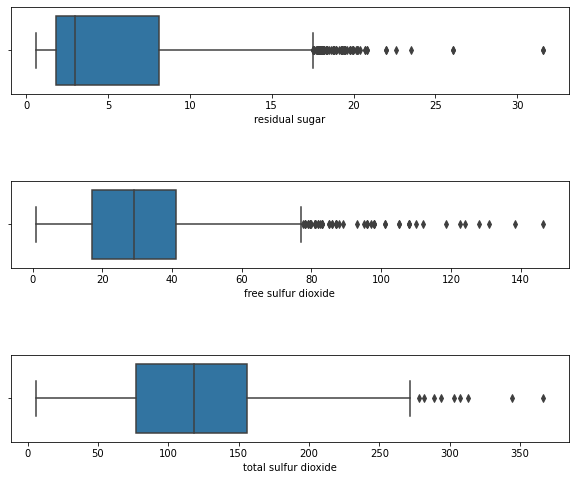

In [68]:
fig, axs = plt.subplots(nrows = 3, figsize = (10,8))

sns.boxplot(df['residual sugar'], ax = axs[0])
sns.boxplot(df['free sulfur dioxide'], ax = axs[1])
sns.boxplot(df['total sulfur dioxide'], ax = axs[2])
fig.subplots_adjust(hspace=1)
plt.show()

In [71]:
df_features = df.iloc[:,:-1]
df_labels = df['class']

In [78]:
### 답안 작성 part ###

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled, columns = df_features.columns)
# train, test 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_scaled, df_labels, test_size=0.2, random_state=42)

### 3-2 Logistic Regression을 이용해 모델에 데이터를 학습시키고, 그 결과를 아래의 get_clf_eval 함수를 이용해 확인해주세요

In [81]:
### 답안 작성 part ###
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_test)

In [82]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, preds)
    accuracy = accuracy_score(y_test , preds)
    precision = precision_score(y_test , preds)
    recall = recall_score(y_test , preds)
    f1 = f1_score(y_test,preds)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}'.format(accuracy, precision, recall, f1))
get_clf_eval(y_test,preds)

오차 행렬
[[954   3]
 [  5 337]]
정확도: 0.9938, 정밀도: 0.9912, 재현율: 0.9854,F1: 0.9883


### 3-3 모델의 정확도가 꽤나 높게 나왔습니다. Logistic Regression은 어떤 원리로 작동하길래 회귀 임에도 불구하고 이진분류에 있어 이렇게 높은 정확도를 낼 수 있었는지 서술해주세요! 

#### 답안 작성 part ####


## * 로지스틱 회귀의 규제화
문제1. 위에서 구한 와인분류 Logistic regression에 대해 규제화를 시행하기 위해,  
penalty가 'l1', 'l2'이고, C(=1/alpha)값이 10, 1, 0인 logistic regression 모형을 6개 만들어주세요.

In [83]:
LR_l2_10 = LogisticRegression(penalty = 'l2', C = 10.0)
LR_l2_1 = LogisticRegression(penalty = 'l2', C = 1.0)
LR_l2_0_1 = LogisticRegression(penalty = 'l2', C = 0.1)
LR_l1_10 = LogisticRegression(penalty = 'l1', C = 10.0, solver = 'liblinear')
LR_l1_1 = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear')
LR_l1_0_1 = LogisticRegression(penalty = 'l1', C = 0.1, solver = 'liblinear')



문제2. 위의 6개 모형을 training data로 학습시키고, 각 모형의 정확도를 구하세요.

In [84]:
model_list = [LR_l2_10, LR_l2_1, LR_l2_0_1, LR_l1_10, LR_l1_1, LR_l1_0_1]

def print_accuracy_after_penalty(model):
    model.fit(x_train, y_train)
    print(F'Training accuracy with {model.penalty} and λ={model.C}:', model.score(x_train, y_train))
    print(F'Test accuracy with {model.penalty} and λ={model.C}:', model.score(x_test, y_test))
    print('-'*60)
    
for model in model_list:
    print_accuracy_after_penalty(model)

Training accuracy with l2 and λ=10.0: 0.9957659738260201
Test accuracy with l2 and λ=10.0: 0.9946112394149346
------------------------------------------------------------
Training accuracy with l2 and λ=1.0: 0.9953810623556582
Test accuracy with l2 and λ=1.0: 0.993841416474211
------------------------------------------------------------
Training accuracy with l2 and λ=0.1: 0.9932640492686682
Test accuracy with l2 and λ=0.1: 0.9892224788298691
------------------------------------------------------------
Training accuracy with l1 and λ=10.0: 0.9955735180908392
Test accuracy with l1 and λ=10.0: 0.993841416474211
------------------------------------------------------------
Training accuracy with l1 and λ=1.0: 0.9955735180908392
Test accuracy with l1 and λ=1.0: 0.9946112394149346
------------------------------------------------------------
Training accuracy with l1 and λ=0.1: 0.9949961508852964
Test accuracy with l1 and λ=0.1: 0.99153194765204
-----------------------------------------------

문제3. Ridge와 LASSO를 비교하세요.

* 공통점: 기존 LSE 방식에서 penalty를 더해 bias를 감수하면서 variance를 낮춰 예측 정확도를 높인다.
* 차이점(2가지 이상): 
** 릿지는 변수를 선택할 수 없지만 라쏘는 변수 선택이 가능하다.
** 릿지는 closed form이 존재하지만 라쏘는 존재하지 않다.

# 4. 소프트맥스 문제


**4-1 로지스틱 회귀와 소프트맥스 회귀에 대해 설명해주세요**

In [85]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [86]:
##데이터셋 불러오기
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- 'sepal_length' ~ 'petal_width' 4개의 변수를 통해 붓꽃의 종을 분류하는 모델을 학습하려고 합니다. 

**4-2 데이터 분류**  

In [110]:
## X_data와 y_data로 분류해주세요.
x_data = iris.iloc[:, :-1]
y_data = iris.iloc[:, [-1]]

In [111]:
## X_data를 StandardScaler를 통해 정규화해주세요.
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

In [112]:
## X_data와 y_data를 학습데이터와 테스트데이터로 분류해주세요. 
## test_size = 0.2, randomstate = 10

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=10)

**1-3 원 핫 인코딩**

In [114]:
## y_train과 y_test를 원 핫 인코딩을 통해 클래스 분류해주세요.
## 값 array 형태로 나오게 해주세요. (변환 방식은 자유롭게 하셔도 됩니다.)

from sklearn.preprocessing import OneHotEncoder
o_encoder = OneHotEncoder(sparse = False)
y_train = o_encoder.fit_transform(y_train)
y_test = o_encoder.fit_transform(y_test)


**1-4 소프트맥스 회귀 모델학습**

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [117]:
## 입력값, 출력값과 어떤 함수를 사용할지 빈칸을 채워주세요.

model = Sequential()
model.add(Dense(input_dim= 4 , units= 3 , activation= 'softmax'))

In [118]:
## 모델학습을 진행해주세요.
## 크로스엔트로피를 사용한 경사하강법으로 최적의 회귀계수와 편향을 구합니다. 
## 가중치 갱신(batch_size)을 10개씩 하도록 설정하고 데이터셋 50번 반복 학습(epochs)하도록 설정합니다. 진행상황(verbose)은 보여지지 않게 설정해주세요. 

model.compile(optimizer= 'sgd' , loss='categorical_crossentropy' , metrics=['accuracy'])
model.fit(x_train, y_train,  batch_size=10, epochs=50, verbose=0)

In [120]:
## 테스트를 진행해 정확도를 측정해주세요.
score = model.evaluate(x_test, y_test)
print('Test accuracy : ', score[1])

1/1 [==============================] - 0s 134ms/step - loss: 0.4379 - accuracy: 0.8667
Test accuracy :  0.8666666746139526
